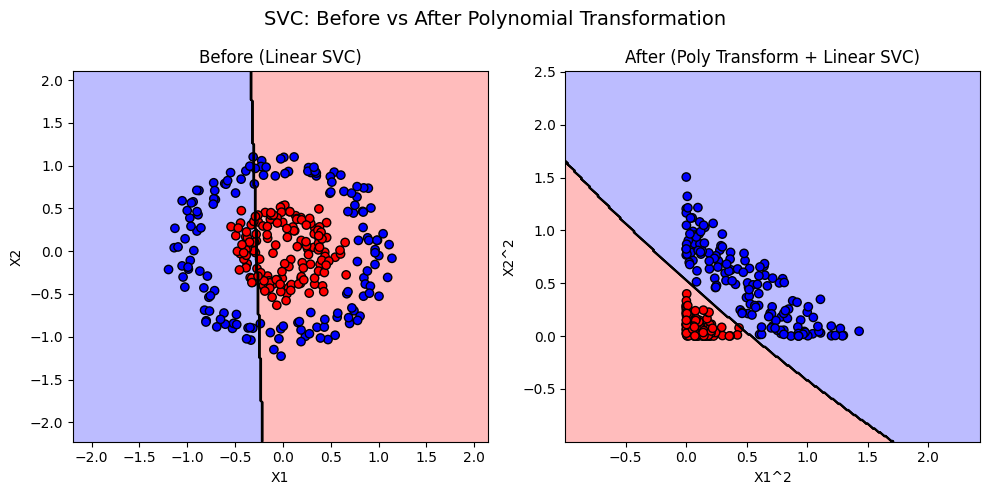

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# 1. Non-linear dataset
X, y = make_circles(n_samples=300, factor=0.4, noise=0.1, random_state=42)

# 2. Linear SVC on original data
svc_linear = SVC(kernel="linear", C=1).fit(X, y)

xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300))
Z_before = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 3. Polynomial features: x1^2, x2^2, x1*x2
X_poly = np.c_[X[:,0]**2, X[:,1]**2, X[:,0]*X[:,1]]
svc_poly = SVC(kernel="linear", C=1).fit(X_poly, y)

xx_p, yy_p = np.meshgrid(np.linspace(X_poly[:,0].min()-1, X_poly[:,0].max()+1, 300),
                         np.linspace(X_poly[:,1].min()-1, X_poly[:,1].max()+1, 300))
Z_after = svc_poly.predict(np.c_[xx_p.ravel(), yy_p.ravel(), (xx_p*yy_p).ravel()]).reshape(xx_p.shape)

# 4. Plot Before vs After
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Before
axes[0].contourf(xx, yy, Z_before, cmap="bwr", alpha=0.3)
axes[0].contour(xx, yy, Z_before, colors='k', linewidths=1)
axes[0].scatter(X[:,0], X[:,1], c=y, cmap="bwr", edgecolor="k")
axes[0].set_title("Before (Linear SVC)")
axes[0].set_xlabel("X1"); axes[0].set_ylabel("X2")

# After
axes[1].contourf(xx_p, yy_p, Z_after, cmap="bwr", alpha=0.3)
axes[1].contour(xx_p, yy_p, Z_after, colors='k', linewidths=1)
axes[1].scatter(X_poly[:,0], X_poly[:,1], c=y, cmap="bwr", edgecolor="k")
axes[1].set_title("After (Poly Transform + Linear SVC)")
axes[1].set_xlabel("X1^2"); axes[1].set_ylabel("X2^2")

plt.suptitle("SVC: Before vs After Polynomial Transformation", fontsize=14)
plt.tight_layout()
plt.show()
